In [240]:
import PIL
import tempfile

In [233]:
import pandas as pd

In [28]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [327]:
from fpdf import FPDF

In [246]:
from tqdm import tqdm

In [393]:
cmToInc = 0.393701
dotPerCm = 300/cmToInc
L = 8.3
A = 5.1
factor_L = dotPerCm * L
factor_A = dotPerCm * A

In [394]:
def set_image_dpi_resize(image,name):
    """
    Rescaling image to 300dpi while resizing
    :param image: An image
    :return: A rescaled image
    """
    size = factor_L, factor_A
    image_resize = image.resize(size, Image.ANTIALIAS)
    #temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='1.png')
    #temp_filename = temp_file.name
    image_resize.save(name, dpi=(300, 300))
    return image_resize

In [395]:
def set_image_resize(image,name):
    """
    Rescaling image to 300dpi while resizing
    :param image: An image
    :return: A rescaled image
    """
    length_x, width_y = image.size
    
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    image_resize = image.resize(size, Image.ANTIALIAS)
    #temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='1.png')
    #temp_filename = temp_file.name
    image_resize.save(name, dpi=(300, 300))
    return image_resize

In [234]:
data = pd.read_csv("registrations.csv")

In [235]:
names 

,ID,Name,Title,Institution Affiliation,Email Address,Registration date,Registration state,Tags
0,189,YASMINE ADIDJA ADDA,Ms,STUDENT,mido.media.sarl@gmail.com,2022-09-25 11:43:30.379838+00:00,Withdrawn,NaN
1,184,Simon Akar,Mr,University of Cincinnati (US),simon.akar@cern.ch,2022-09-22 13:06:22.766069+00:00,Completed,NaN
2,159,Fabrizio Alfonsi,Mr,"Universita e INFN, Bologna (IT)",fabrizio.alfonsi@cern.ch,2022-09-02 12:59:58.967104+00:00,Completed,NaN
3,207,Corentin Allaire,Mr,Université Paris-Saclay (FR),corentin.allaire@cern.ch,2022-10-03 14:34:41.848277+00:00,Awaiting payment,NaN
4,24,Marica Antonacci,Mr,INFN,marica.antonacci@ba.infn.it,2022-07-17 08:52:36.565508+00:00,Completed,NaN
...,...,...,...,...,...,...,...,...
237,93,Fukuko YUASA,Dr,KEK,fukuko.yuasa@kek.jp,2022-08-19 06:26:14.090226+00:00,Completed,NaN
238,129,Philipp Zehetner,Mr,CERN,philipp.zehetner@cern.ch,2022-08-23 14:00:30.522544+00:00,Completed,NaN
239,96,minxing zhang,Mr,The Institute of High Energy Physics of the Ch...,zhangmx@ihep.ac.cn,2022-08-19 08:35:41.242306+00:00,Withdrawn,NaN
240,243,Guang Zhao,Dr,Institute of High Energy Physics,zhaog@ihep.ac.cn,2022-10-14 02:26:37.271503+00:00,Withdrawn,NaN


In [150]:
import tkinter.font as TkFont

In [287]:
S = 12*3
s = 8*3
FONT = "azonix/Azonix.otf"
font = ImageFont.truetype(FONT, S)
font_institution = ImageFont.truetype(FONT, S-3)
font_small = ImageFont.truetype(FONT, s)

In [420]:
filename = "badge_4.png"
bkg = Image.open(filename)
W, H = bkg.size
I1 = ImageDraw.Draw(bkg)
I1.text((W/2,H/2-S), "Adriano Di Florio", fill=(0, 0, 0),font=font,anchor="mm")
I1.textbbox((W/2,H/2-12+H/12), "Poliba",font=font_institution,anchor="mm")
new_w = new_box[2] - new_box[0]  # bottom-top
new_h = new_box[3] - new_box[1]
I1.text((W/2,4*H/5-H/20), "24-28 October 2022, Bari, Italy", fill=(0, 0, 0),font=font_small,anchor="mm")

In [414]:
W, H = bkg.size

In [415]:
bkg.save("test.png")

In [416]:
display(set_image_dpi_resize(bkg))

TypeError: set_image_dpi_resize() missing 1 required positional argument: 'name'

In [417]:
!open /var/folders/pp/jswqhmxn6kq77l5_xh9njlt40000gn/T/tmp3paqcxfe1.png

In [442]:
max_w = 450
imagelist = []
for n,f in enumerate(tqdm(data[["Name","Institution Affiliation"]].values)):
    
    N = f[0]
    I = f[1]
    
    badge = Image.open(filename)
    
    I1 = ImageDraw.Draw(badge)
    
    new_w = 9000
    SN = 12*3
    font = ImageFont.truetype(FONT, SN)
    new_box = I1.textbbox((W/2,H/2-12+H/12), N,font=font,anchor="mm")
    new_w = new_box[2] - new_box[0] 
    
    while max_w<new_w and SN>1:
        SN = SN - 1
        font = ImageFont.truetype(FONT, SN)
        new_box = I1.textbbox((W/2,H/2-12+H/12), N,font=font,anchor="mm")
        new_w = new_box[2] - new_box[0] 
        
    I1.text((W/2,H/2-S), N, fill=(0, 0, 0),font=font,anchor="mm")
    
    new_w = 9000
    SI = SN - 1
    font_institution = ImageFont.truetype(FONT, S-2)
    new_box = I1.textbbox((W/2,H/2-12+H/12), I,font=font_institution,anchor="mm")
    new_w = new_box[2] - new_box[0]  # bottom-top
    
    while max_w<new_w and SI>0:
        SI = SI - 1
        font_institution = ImageFont.truetype(FONT, SI)
        new_box = I1.textbbox((W/2,H/2-12+H/12), I,font=font_institution,anchor="mm")
        new_w = new_box[2] - new_box[0] 
    
    I1.text((W/2,H/2-12+H/12), I, fill=(0, 0, 0),font=font_institution,anchor="mm")

    I1.text((W/2,4*H/5-H/20), "24-28 October 2022, Bari, Italy", fill=(0, 0, 0),font=font_small,anchor="mm")
    imagelist.append(set_image_resize(badge,"badges/badge_%d.png"%n))
    #set_image_resize(badge,"badges/badge_%d.png"%n)

  0%|                                                                                                                | 0/242 [00:00<?, ?it/s]/var/folders/pp/jswqhmxn6kq77l5_xh9njlt40000gn/T/ipykernel_61082/473331563.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image_resize = image.resize(size, Image.ANTIALIAS)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 242/242 [00:15<00:00, 15.62it/s]


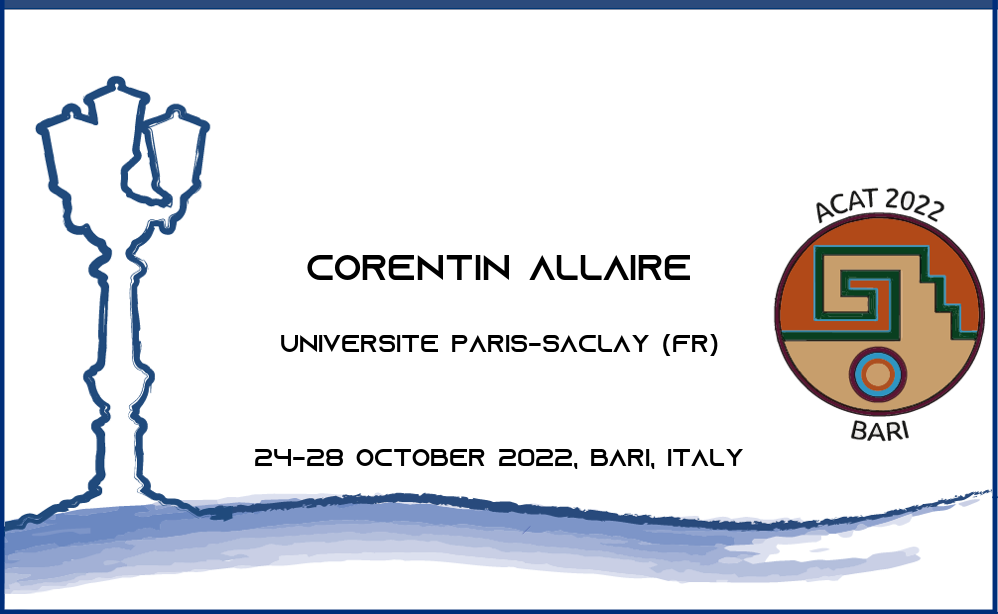

In [428]:
display(imagelist[3])

In [432]:
gap = 150
dx = imagelist[3].getbbox()[2]
dy = imagelist[3].getbbox()[3]

In [430]:
a4im = Image.new('RGB',
                 (2480, 3508),   # A4 at 72dpi
                 (255, 255, 255))  # White
a4im.paste(imagelist[3],(150,100))  # Not centered, top-left corner
a4im.paste(imagelist[4],(300+x,100))  # Not centered, top-left corner
a4im.save("test.pdf", 'PDF', quality=100)

In [441]:
a4im = Image.new('RGB',
                 (2480, 3508),   # A4 at 72dpi
                 (255, 255, 255)) 
C = 0
im = 0
for n,i in enumerate(imagelist):
    N = n + 1
    print(n%10)
    if n%8==0 and n>0:
        a4im.save("test%d.pdf"%C, 'PDF', quality=100)
        C = C + 1
        im = 0
        a4im = Image.new('RGB',
                 (2480, 3508),   # A4 at 72dpi
                 (255, 255, 255)) 

    a4im.paste(i,(gap+(dx+gap)*int(im%2),(dy+gap)*int(im/2)+gap))
    im = im + 1

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [ ]:
y1 = 100
